<a href="https://colab.research.google.com/github/molecools/molecular-docking/blob/main/Sequence_Biopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SRA721637_SRS3416994.clusters.txt")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df


,AAACCTGCAATAAGCA 4
0,AAACCTGGTCGCCATG 2
1,AAACGGGAGACCGGAT 6
2,AAACGGGAGCAGCGTA 1
3,AAAGATGAGCGTGAGT 3
4,AAAGATGCAACTGCGC 0
...,...
1577,TTTGGTTTCACGGTTA 3
1578,TTTGGTTTCTGCCCTA 1
1579,TTTGTCAAGCTTATCG 1
1580,TTTGTCAGTCCGAAGA 0


In [4]:
!pip install biopython
import Bio
from Bio import SeqIO
import Bio
print(Bio.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 29.9 MB/s eta 0:00:00
1.85


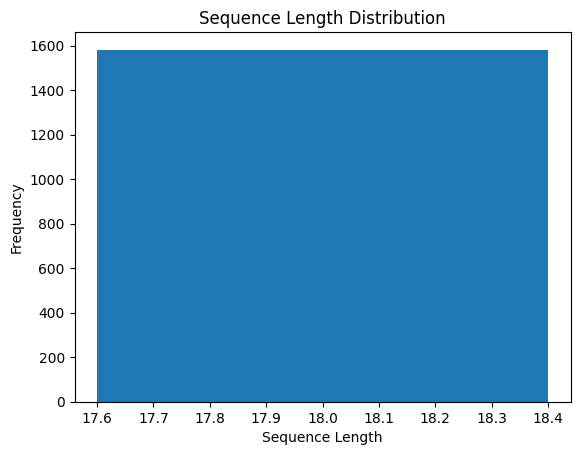

In [5]:
# Extract the sequences
sequences = df.iloc[:, 0].tolist()

# Calculate sequence lengths
lengths = [len(seq) for seq in sequences]

# Plot the histogram
plt.hist(lengths, bins=range(min(lengths), max(lengths) + 2), align='left', rwidth=0.8)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Sequence Length Distribution')
plt.show()

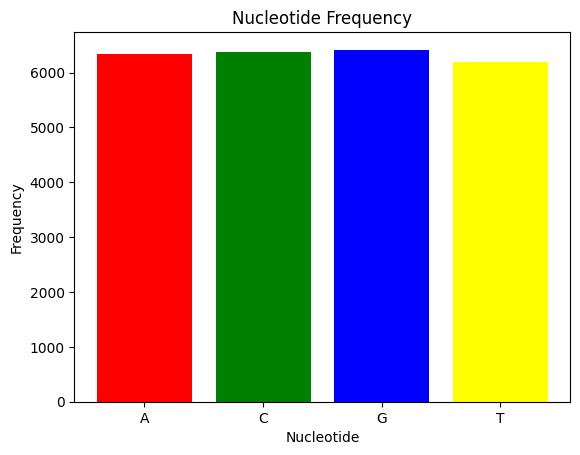

In [6]:
# Extract the sequences
#sequences = data.iloc[:, 0].tolist()

# Initialize nucleotide counts
nucleotide_counts = {'A': 0, 'C': 0, 'G': 0, 'T': 0}


# Count nucleotides
for seq in sequences:
    for nucleotide in seq.upper():  # Convert to uppercase
        if nucleotide in nucleotide_counts:  # Check if nucleotide is in the dictionary
            nucleotide_counts[nucleotide] += 1

nucleotides = ['A', 'C', 'G', 'T']
counts = [nucleotide_counts[n] for n in nucleotides]
colors = ['red', 'green', 'blue', 'yellow']

plt.bar(nucleotides, counts, color=colors)
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide Frequency')
plt.show()

/usr/local/lib/python3.11/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


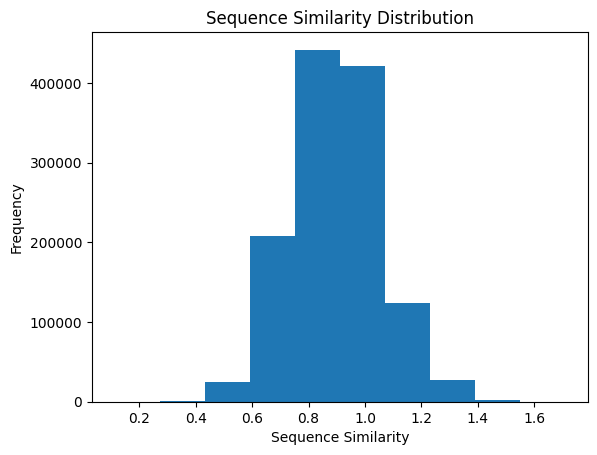

In [7]:
from Bio import pairwise2



# Calculate sequence similarity
similarities = []
for i in range(len(sequences)):
    for j in range(i + 1, len(sequences)):
        alignments = pairwise2.align.globalms(sequences[i], sequences[j], 2, -1, -.5, -.1)
        similarity = alignments[0].score / max(len(sequences[i]), len(sequences[j]))
        similarities.append(similarity)

# Plot the histogram
plt.hist(similarities, bins=10)
plt.xlabel('Sequence Similarity')
plt.ylabel('Frequency')
plt.title('Sequence Similarity Distribution')
plt.show()